# Zadanie 1

Odszyfrowana wiadomość: witam w


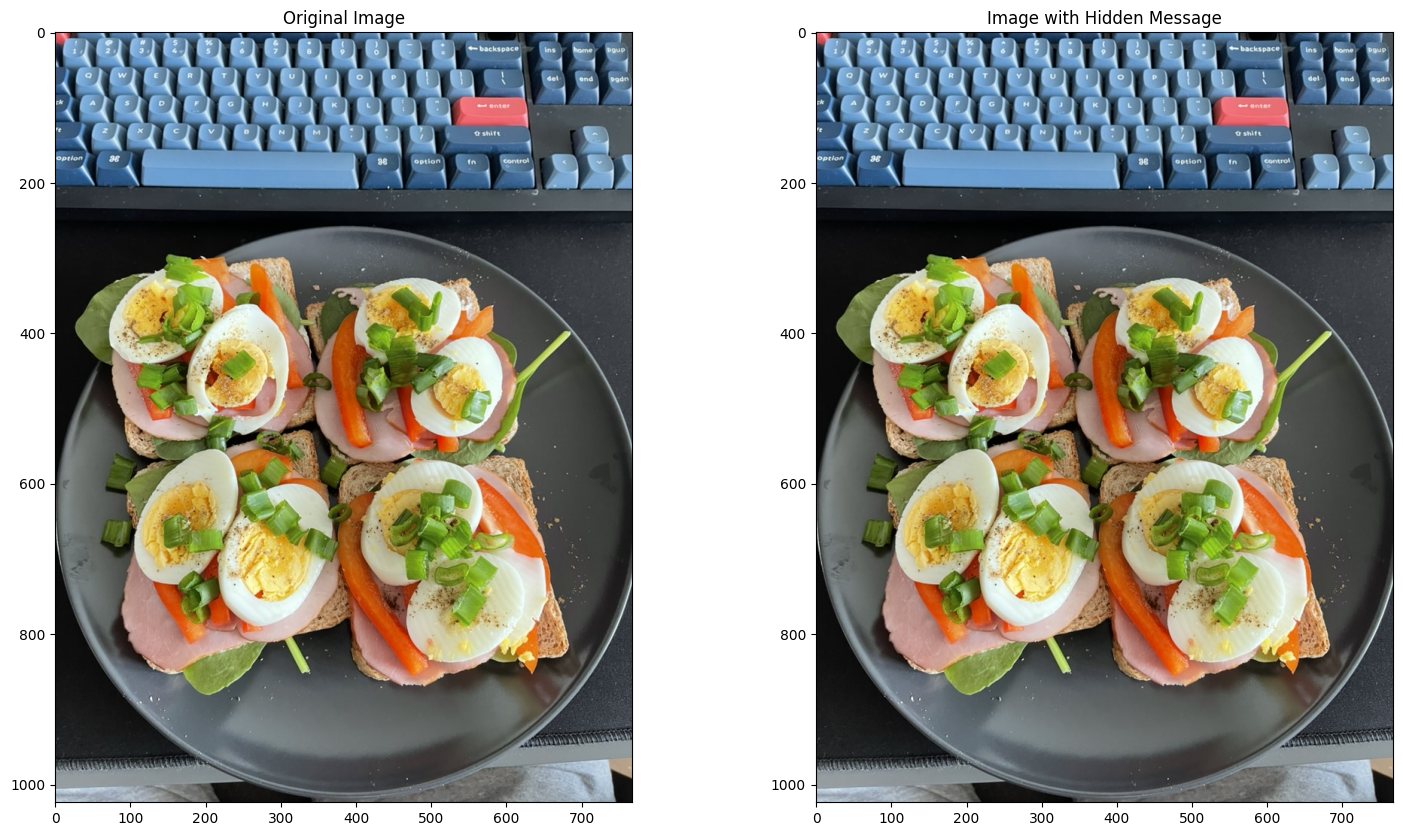

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import binascii
import cv2 as cv
import math
plt.rcParams["figure.figsize"] = (18,10)

def encode_as_binary_array(msg):
    msg = msg.encode("utf-8")
    msg = msg.hex()
    msg = [msg[i:i + 2] for i in range(0, len(msg), 2)]
    msg = [ "{:08b}".format(int(el, base=16)) for el in msg]
    return "".join(msg)

def load_image(path, pad=False):
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if pad:
        y_pad = 8 - (image.shape[0] % 8)
        x_pad = 8 - (image.shape[1] % 8)
        image = np.pad(
            image, ((0, y_pad), (0, x_pad) ,(0, 0)), mode='constant')
    return image

def save_image(path, image):
    plt.imsave(path, image) 

def clamp(n, minn, maxn):
    return max(min(maxn, n), minn)

def hide_message(image, message, nbits=1):
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")
    
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)
        
    return image.reshape(shape)

def decode_from_binary_array(array):
    array = [array[i:i+8] for i in range(0, len(array), 8)]
    if len(array[-1]) != 8:
        array[-1] = array[-1] + "0" * (8 - len(array[-1]))
    array = [ "{:02x}".format(int(el, 2)) for el in array]
    array = "".join(array)
    result = binascii.unhexlify(array)
    return result.decode("utf-8", errors="replace")

def reveal_message(image, nbits=1, length=0):
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)
    
    message = ""
    i = 0
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

message = "witam w"
binary = encode_as_binary_array(message)

original_image = load_image("images/sniadanie.jpeg")
n = 1

image_with_message = hide_message(original_image, binary, n)

save_image("images/output_image.png", image_with_message)

f, ar = plt.subplots(1, 2)
ar[0].imshow(original_image)
ar[0].set_title("Original Image")
ar[1].imshow(image_with_message)
ar[1].set_title("Image with Hidden Message")

decoded_image = load_image("images/output_image.png")
retrieved_binary = reveal_message(decoded_image, nbits=n, length=len(binary))
retrieved_message = decode_from_binary_array(retrieved_binary)

print("odszyfrowana wiadomość:", retrieved_message)



# Zadanie 2

In [25]:
#
# tu umieść kod
#

# Zadanie 3

In [26]:
#
# tu umieść kod
#

# Zadanie 4

In [27]:
#
# tu umieść kod
#

# Zadanie 5

In [28]:
#
# tu umieść kod
#